In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import joblib
import chardet
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [47]:
path = r'C:\Users\cavlc\OneDrive\Desktop\Pinnacle Full-Stack Intern\Pinnacle-Full-Stacks-Intern\spam.csv'

with open(path, 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv(path, names=['label', 'text'], encoding=result['encoding'])
df.head()
df.describe()

,label,text
count,12,6
unique,10,5
top,"MK17 92H. 450Ppw 16""","GNT:-)"""
freq,2,2


In [48]:
# Step 2: Preprocess the data
X = df['text']
y = df['label']

# Convert labels to binary: ham -> 0, spam -> 1
y = y.apply(lambda x: 1 if x == 'spam' else 0)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle NaN values in X_train and X_test
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Adjust y_train to match X_train indices
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]     # Adjust y_test to match X_test indices

# Initialize a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [49]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    random_colors = np.random.rand(256, 3)
    random_cmap = plt.cm.colors.ListedColormap(random_colors)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=random_cmap)
    plt.title(title)
    plt.show()

Accuracy for XGBoost model: 1.00
classification report for XGBoost model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\cavlc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


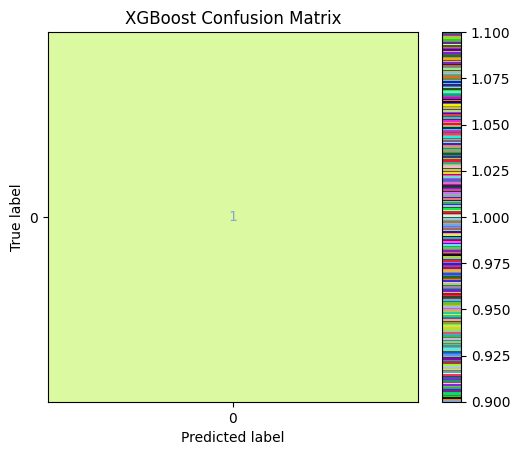

In [50]:
# Build the XGBoost model
classifier = xgb.XGBClassifier()

# Train the model
classifier.fit(X_train_tfidf, y_train)

# Evaluate the model
# Predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for XGBoost model: {accuracy:.2f}')

# Classification report
print("classification report for XGBoost model")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, "XGBoost Confusion Matrix")

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Accuracy (GridSearchCV): 1.00
classification report for XGBoost model after hyperparameteriszing with GridSearch
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\cavlc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


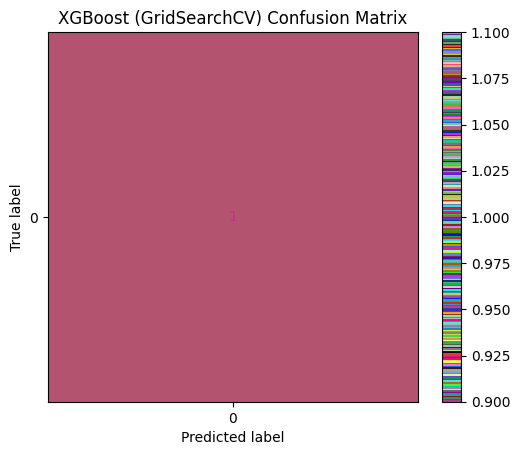

In [51]:
# Hyperparameter tuning using GridSearchCV 
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid = GridSearchCV(xgb.XGBClassifier(), param_grid, cv=5)
grid.fit(X_train_tfidf, y_train)

# Best parameters
print(grid.best_params_)

# Predictions using the best model
y_pred_grid = grid.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f'Accuracy (GridSearchCV): {accuracy_grid:.2f}')

# Classification report
print("classification report for XGBoost model after hyperparameteriszing with GridSearch")
print(classification_report(y_test, y_pred_grid))
plot_confusion_matrix(y_test, y_pred_grid, "XGBoost (GridSearchCV) Confusion Matrix")

Accuracy: 1.00
classification report for Random Forest model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\cavlc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


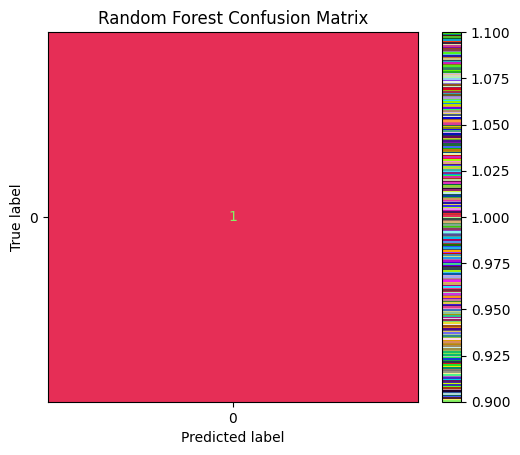

In [52]:
# Build the Random Forest model
classifier_rf = RandomForestClassifier(random_state=42)

# Train the model
classifier_rf.fit(X_train_tfidf, y_train)

# Evaluate the model
# Predictions on the test set
y_pred_rf = classifier_rf.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

# Classification report
print("classification report for Random Forest model")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")

{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (GridSearchCV): 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\cavlc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


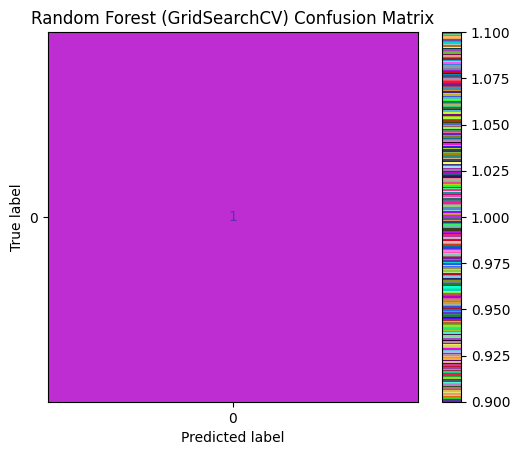

In [53]:
# Hyperparameter tuning using GridSearchCV 
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=2)
grid_rf.fit(X_train_tfidf, y_train)

# Best parameters
print(grid_rf.best_params_)

# Predictions using the best model
y_pred_grid_rf = grid_rf.predict(X_test_tfidf)

# Evaluate accuracy
accuracy_grid_rf = accuracy_score(y_test, y_pred_grid_rf)
print(f'Accuracy (GridSearchCV): {accuracy_grid_rf:.2f}')

# Classification report
print(classification_report(y_test, y_pred_grid_rf))
plot_confusion_matrix(y_test, y_pred_grid_rf, "Random Forest (GridSearchCV) Confusion Matrix")

Accuracy Test Score for GaussianNB:  1.0
classification report for GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\cavlc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


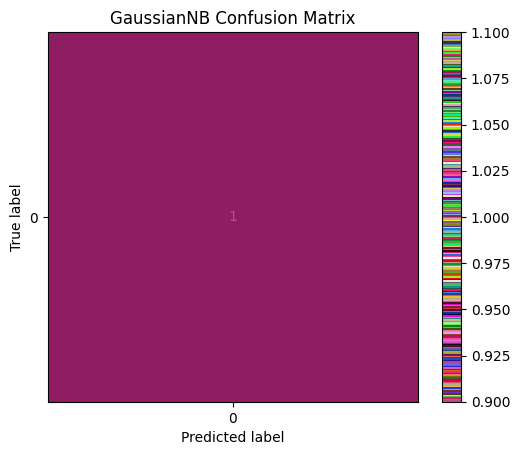

In [54]:
# Convert the sparse matrix to a dense array
X_train_tfidf_dense = X_train_tfidf.toarray()
X_test_tfidf_dense = X_test_tfidf.toarray()

# Create the GaussianNB model
gnb = GaussianNB()

# Fit the model with the dense training data
gnb.fit(X_train_tfidf_dense, y_train)

# Make predictions on the dense test data
gnb_pred = gnb.predict(X_test_tfidf_dense)

# Print the accuracy test score
print("Accuracy Test Score for GaussianNB: ", accuracy_score(y_test, gnb_pred))

# Classification report
print("classification report for GaussianNB")
print(classification_report(y_test, y_pred_grid_rf))
plot_confusion_matrix(y_test, gnb_pred, "GaussianNB Confusion Matrix")

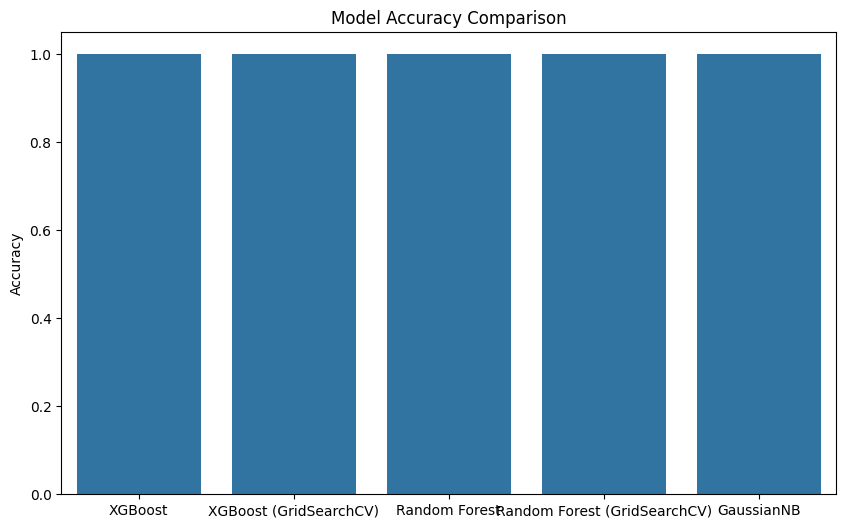

In [55]:
# Bar Plot of Accuracy Scores
models = ['XGBoost', 'XGBoost (GridSearchCV)', 'Random Forest', 'Random Forest (GridSearchCV)', 'GaussianNB']
accuracies = [accuracy, accuracy_grid, accuracy_rf, accuracy_grid_rf, accuracy_score(y_test, gnb_pred)]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()